In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
nuances2022 = (
    pd
    .read_csv('lg2022_t1_nuances.csv')
    .set_index('CodCirc2')
    .assign(
        EXG = lambda df: df.NUP #+ df.ECO + df.DVG
    )
)

nuances2022

,DIV,DSV,DVC,DVD,DVG,DXD,DXG,ECO,ENS,LR,NUP,RDG,REC,REG,RN,UDI,EXG
CodCirc2,,,,,,,,,,,,,,,,,
01001,NaN,True,NaN,NaN,NaN,NaN,True,True,True,True,True,NaN,True,NaN,True,NaN,True
01002,True,True,NaN,True,NaN,NaN,True,True,True,True,True,NaN,True,NaN,True,NaN,True
01003,True,True,True,NaN,NaN,NaN,True,True,True,True,True,NaN,True,NaN,True,NaN,True
01004,NaN,True,True,True,True,NaN,True,True,True,True,True,True,True,NaN,True,NaN,True
01005,True,True,NaN,True,True,NaN,True,NaN,NaN,True,True,NaN,True,NaN,True,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZ007,True,NaN,True,True,True,NaN,NaN,True,True,True,True,NaN,True,True,True,NaN,True
ZZ008,True,NaN,True,NaN,True,NaN,NaN,True,True,NaN,True,True,True,NaN,True,True,True
ZZ009,True,NaN,True,True,True,True,NaN,NaN,True,True,True,NaN,True,NaN,True,NaN,True


In [3]:
nuances2024 = (
    pd
    .read_csv('lg2024_t1_nuances.csv')
    .set_index('CodCirc')
)

nuances2024

,COM,DIV,DSV,DVC,DVD,DVG,ECO,ENS,EXD,EXG,...,LR,RDG,REC,REG,RN,SOC,UDI,UG,UXD,VEC
CodCirc,,,,,,,,,,,,,,,,,,,,,
01001,False,False,True,False,False,False,False,True,False,True,...,True,False,False,False,True,False,False,True,False,False
01002,False,False,False,True,False,False,False,False,True,True,...,True,False,False,False,True,False,False,True,False,False
01003,False,True,True,False,False,False,False,True,False,True,...,True,False,False,False,True,False,False,True,False,False
01004,False,True,False,False,False,False,False,True,False,True,...,True,False,False,False,True,False,False,True,False,False
01005,False,False,False,False,True,False,True,True,False,True,...,True,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZ007,False,True,False,True,False,True,False,True,False,False,...,True,False,True,False,True,False,False,True,False,False
ZZ008,False,True,False,True,True,True,False,True,False,False,...,True,False,True,False,False,False,False,True,False,False
ZZ009,False,True,True,True,True,True,False,True,False,False,...,True,False,True,False,True,False,False,True,False,False


In [4]:
set(nuances2024.index.to_list()) - set(nuances2022.index.to_list())

set()

In [5]:
fond = (
    gpd.read_file('sources/fond_circonscriptions_legislatives.geojson')
    .assign(
        CodCirc = lambda df: df.num_dept.str.pad(3, fillchar='0') + df.num_circo.str.pad(2, fillchar='0')
    )
    .assign(
        code_cinq = lambda df: df.code_cinq.str.pad(5, 'left', '0')
    )
    .set_index('code_cinq')
    .sort_index()
)

fond

/Users/tamkien-duong/.virtualenvs/notebooks/lib/python3.9/site-packages/fiona/collection.py:208: FeatureWarning: Empty field name at index 17
  self._schema = self.session.get_schema()
/Users/tamkien-duong/.virtualenvs/notebooks/lib/python3.9/site-packages/geopandas/geodataframe.py:635: UserWarning: Empty field name at index 17
  for feature in features_lst:


,departement,code,num_dept,num_circo_letter,region,num_circo,code_region,ville,Nom de la circonscription législative (nom du département suivi du numéro de circonscription),Inscrits,...,sexe_candidat_03,parti_candidat_03,coalition_candidat_03,voix_candidat_03,score_candidat_03,elu_candidat_03,qualifie_candidat_03,groupe_candidat_03,geometry,CodCirc
code_cinq,,,,,,,,,,,,,,,,,,,,,
01001,Ain,1001,1,1e circonscription,Auvergne-Rhône-Alpes,1,84,,Ain - 1re circonscription,85742,...,,,,,,,,,"MULTIPOLYGON (((4.88821 46.40298, 4.89628 46.3...",00101
01002,Ain,1002,1,2e circonscription,Auvergne-Rhône-Alpes,2,84,,Ain - 2e circonscription,99419,...,,,,,,,,,"MULTIPOLYGON (((5.43563 45.82977, 5.47856 45.8...",00102
01003,Ain,1003,1,3e circonscription,Auvergne-Rhône-Alpes,3,84,,Ain - 3e circonscription,81519,...,,,,,,,,,"MULTIPOLYGON (((5.83123 45.93846, 5.83403 45.9...",00103
01004,Ain,1004,1,4e circonscription,Auvergne-Rhône-Alpes,4,84,,Ain - 4e circonscription,94396,...,,,,,,,,,"MULTIPOLYGON (((4.88821 46.40298, 4.85853 46.3...",00104
01005,Ain,1005,1,5e circonscription,Auvergne-Rhône-Alpes,5,84,,Ain - 5e circonscription,77174,...,,,,,,,,,"MULTIPOLYGON (((5.51137 46.26436, 5.46410 46.2...",00105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZ007,Français établis hors de France,ZZ007,,7e circonscription,Europe centrale et orientale,,,,Français établis hors de France - 7e circonscr...,122145,...,,,,,,,,,"POLYGON ((4.86701 40.77846, 4.86701 41.06739, ...",00000
ZZ008,Français établis hors de France,ZZ008,,8e circonscription,Europe du sud,,,,Français établis hors de France - 8e circonscr...,130068,...,,,,,,,,,"POLYGON ((5.38895 40.77846, 5.38895 41.06739, ...",00000
ZZ009,Français établis hors de France,ZZ009,,9e circonscription,"Maghreb, Afrique de l'ouest",,,Français établis hors de France,Français établis hors de France - 9e circonscr...,121013,...,,,,,,,,,"POLYGON ((5.90540 40.77846, 5.90540 41.06739, ...",00000


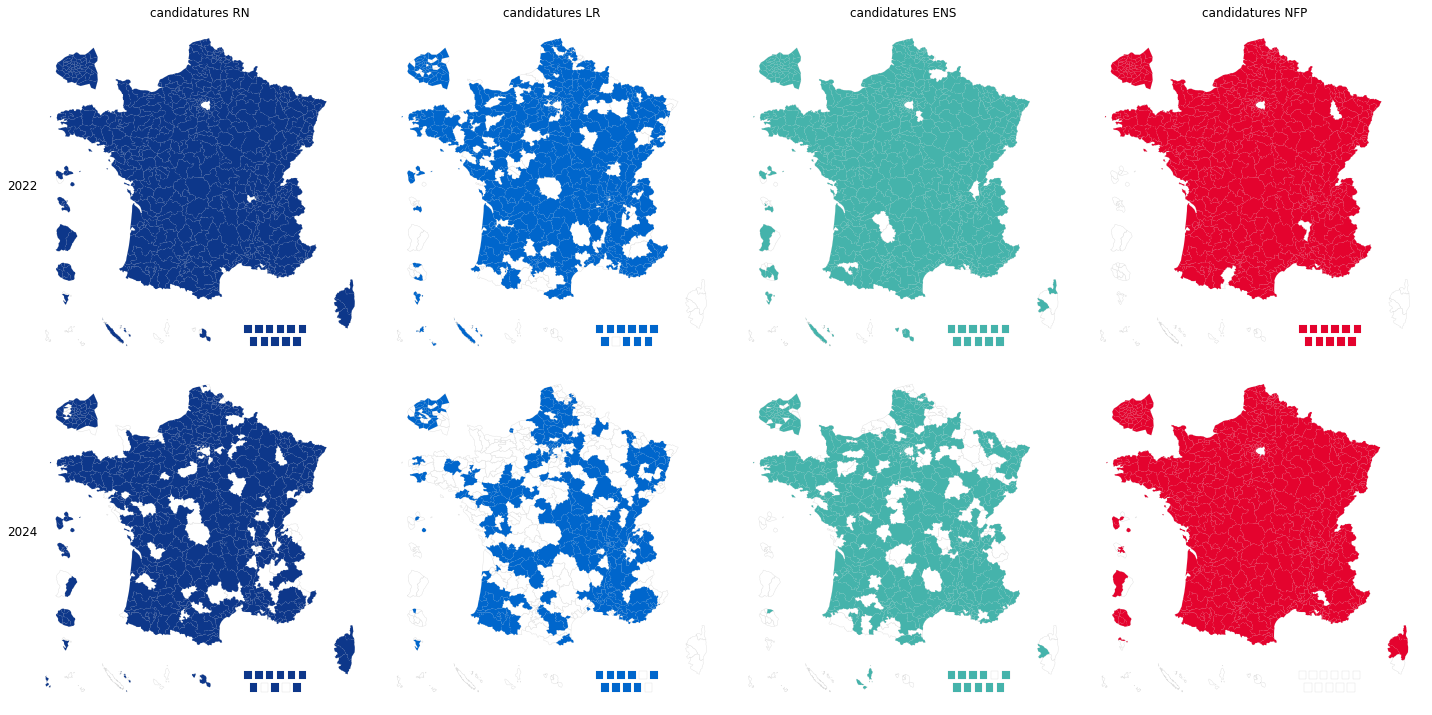

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(20, 10), sharex='all', sharey='all')

def draw(year, nuance, color, ax):
    #ax.set_axis_off()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    fond.plot(
        color='white',
        edgecolor='#ddd',
        linewidth=0.4,
        ax=ax
    )
    
    return (
        fond
        .join(year)
        .query(f'{nuance} >= 1')
        .plot(
            ax=ax,
            color = color
        )
    )

annees = [
    ('2022', nuances2022),
    ('2024', nuances2024)
]


selection = [
    ('RN', '#0D378A'),
    ('LR', '#0066CC'),
    ('ENS', '#45b3ab'),
    ('EXG', '#e4032e'),
]

pad = 0
    
for (r, (year, df)) in enumerate(annees):
    ax[r, 0].set_ylabel(year, rotation=0, size='large')

for (c,(s,_)) in enumerate(selection):
    label = s if s != 'EXG' else 'NFP'
    ax[0, c].set_title(f'candidatures { label }')

for (r, (year, df)) in enumerate(annees):
    for (c, (nuance, color)) in enumerate(selection):
        draw(df, nuance, color, ax[r, c])

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.savefig('lg-2022-2024.png')